In [1]:
%matplotlib inline

Plot segmentation masks
=======================

This example shows how to use `squidpy.pl.spatial_segment` to plot
segmentation masks and features in `anndata.AnnData`.

This plotting is useful when segmentation masks and underlying image are
available.

:::{seealso}

    See {doc}`plot_scatter` for scatter plot.
    
:::


In [3]:
import squidpy as sq

adata = sq.datasets.mibitof()
adata.uns["spatial"].keys()

dict_keys(['point16', 'point23', 'point8'])

In this dataset we have 3 unique keys, which means that there are 3
unique `` `library_id ``[. As detailed in
{ref}\`sphx\_glr\_auto\_tutorials\_tutorial\_read\_spatial.py]{.title-ref},
it means that there are 3 unique field of views (FOV) in this dataset.
The information to link the library ids to the observations are stored
in {attr}`adata.obs`.


In [4]:
adata.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,batch,library_id
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,0,point23
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,0,point23
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,0,point23
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,0,point23
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,0,point23
...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,2,point16
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,2,point16
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,2,point16
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,2,point16


Specifically, the key `` `library_id ``[ in
{attr}\`adata.obs]{.title-ref} contains the same unique values contained
in {attr}`adata.uns`. We can visualize the 3 spatial dataset with
`squidpy.pl.spatial_segment`.


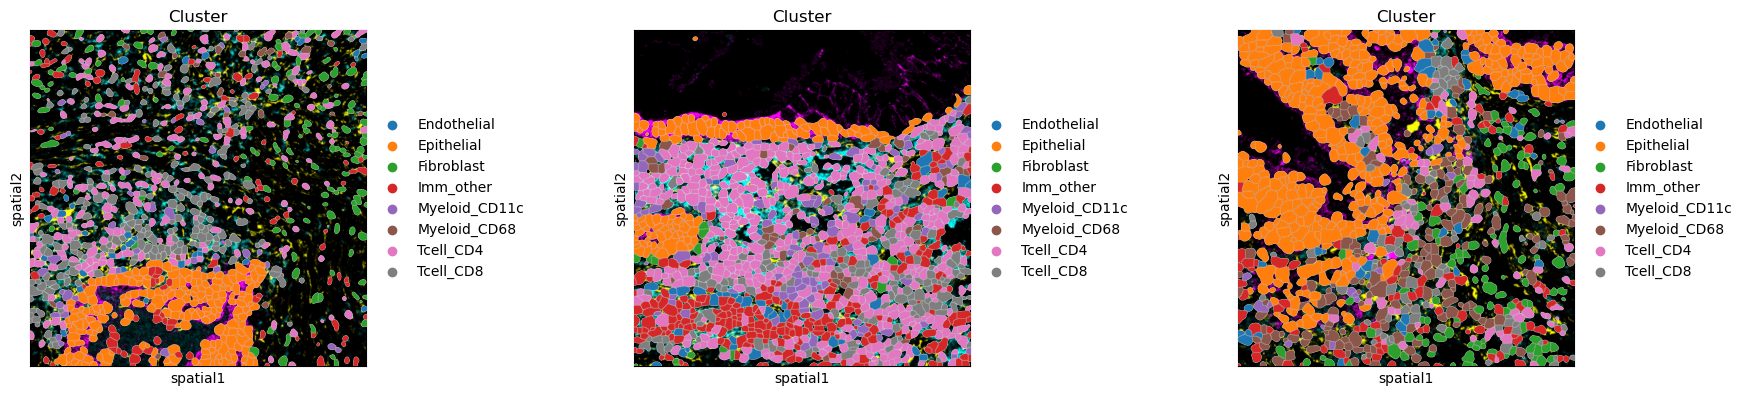

In [5]:
sq.pl.spatial_segment(
    adata, color="Cluster", library_key="library_id", seg_cell_id="cell_id"
)

There are several parameters that can be controlled. For instance, it is
possible to plot segmentation masks as \"contours\", in order to
visualize the underlying image. Let\'s visualize it for one specific
cropped FOV.


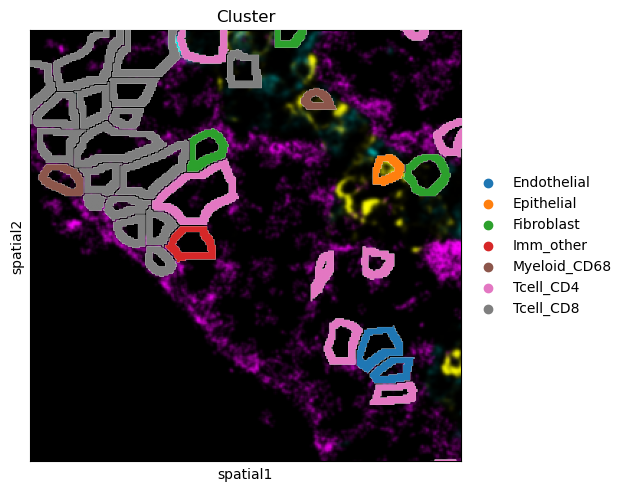

In [6]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    library_key="library_id",
    library_id="point8",
    seg_cell_id="cell_id",
    seg_contourpx=10,
    crop_coord=[(0, 0, 300, 300)],
)

It\'s also possible to add an outline to better distinguish segmentation
masks\' boundaries. Furthermore, the underlying image can be removed,
gray scaled or single channels can be plotted.


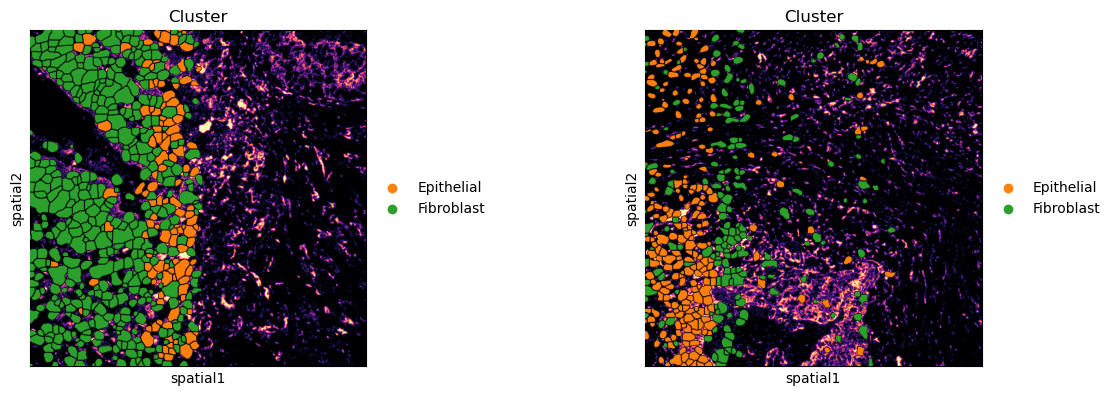

In [7]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    groups=["Fibroblast", "Epithelial"],
    library_key="library_id",
    library_id=["point8", "point16"],
    seg_cell_id="cell_id",
    seg_outline=True,
    img_channel=0,
    img_cmap="magma",
)

If groups of observations are plotted (as above), it\'s possible to
modify whether to \"visualize\" the segmentation masks that do not
belong to any selected group. It is set as \"transparent\" by default
(see above) but in cases where e.g. no image is present it can be useful
to visualize them nonetheless


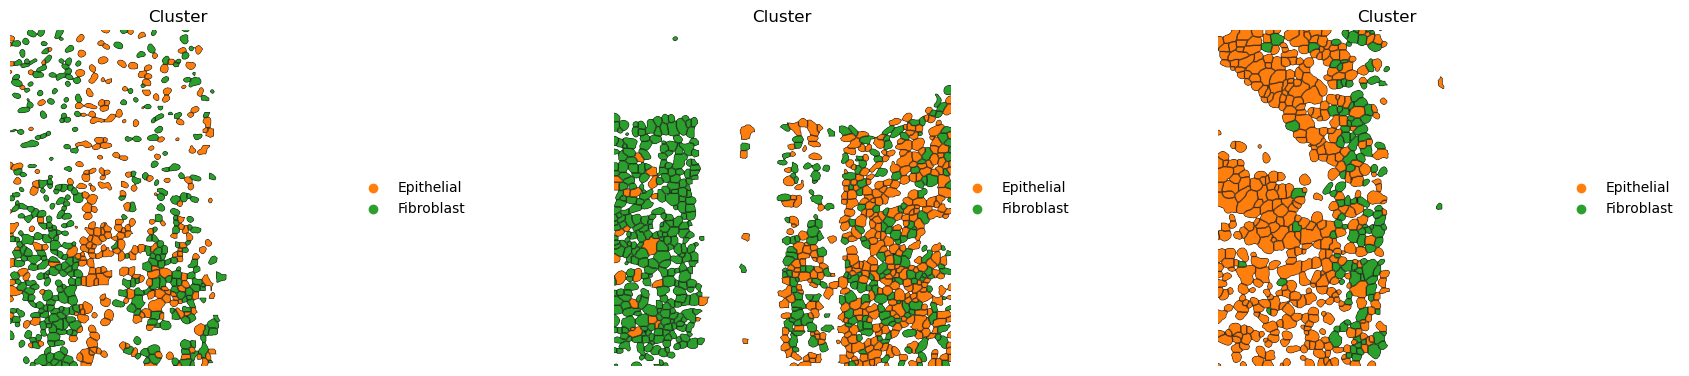

In [8]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    groups=["Fibroblast", "Epithelial"],
    library_key="library_id",
    seg_cell_id="cell_id",
    seg_outline=True,
    img=False,
    frameon=False,
)

Finally, a scale bar can be added, where size and pixel units must be
passed. The size for this example are not the real values and are for
purely visualization purposes.


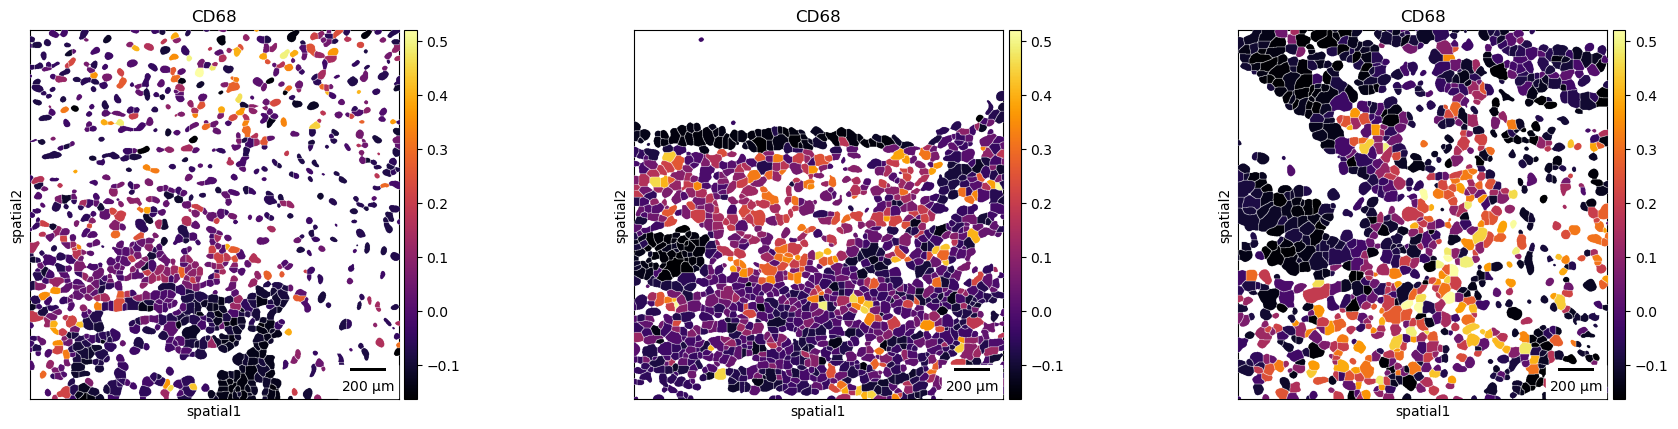

In [9]:
sq.pl.spatial_segment(
    adata,
    color="CD68",
    library_key="library_id",
    seg_cell_id="cell_id",
    img=False,
    cmap="inferno",
    scalebar_dx=2.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)